# Del 8: Uvod v strojno učenje - Nadaljevanje

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#instance based learning: rabimo ene podatke, iz katerih naredimo predikcijo, 

#model based learning: imamo neke podatke, izračunamo model, potestiramo podatke čez to "enačbo"; bolj učinkovito je
#primer je linearna regresija

## Instance Based Learning Vs. Model Based Learning




<p><img alt="KNN Complexity" src="images/knn_complexity.svg"></p>

<p><img alt="Model Based Learning" src="images/regression_complexity.png"></p>


## Linear Regression

### Introduction To The Data


<p>Here are some of the columns:</p>
<ul>
<li><code>Lot Area</code>: Lot size in square feet.</li>
<li><code>Overall Qual</code>: Rates the overall material and finish of the house.</li>
<li><code>Overall Cond</code>: Rates the overall condition of the house.</li>
<li><code>Year Built</code>: Original construction date.</li>
<li><code>Low Qual Fin SF</code>: Low quality finished square feet (all floors).</li>
<li><code>Full Bath</code>: Full bathrooms above grade.</li>
<li><code>Fireplaces</code>: Number of fireplaces.</li>
</ul>


In [2]:
import pandas as pd
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

In [3]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
#imamo podatke o hišah, napovedujemo ceno za prodajo hiše (sale price)

### Simple Linear Regression


<p><img alt="Simple Linear Regression" src="images/simple_linear_regression.svg"></p>


In [ ]:
#osnovna enačba linearne regresije: y = a1*x1 + a
#y je target, x1 je značilka, a0 in a1 sta parametra
#regresija izračuna parametra a0 in a1 in potem to enačbo lahko uporabimo za kaerikoli podatke

#dobro je, da so podatki čimbolj korelirani, bolj kot so razpršeni, bolj nenatančen bo model

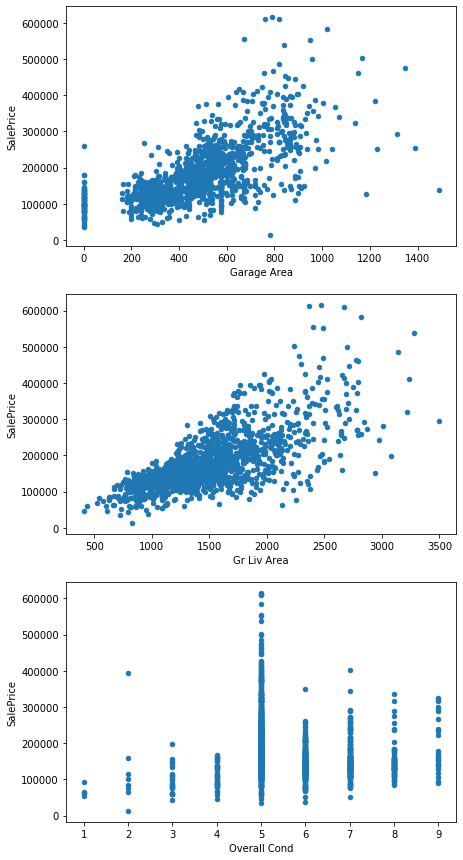

In [5]:
#vzamemo 3 stolpce, izrišemo podatke v 3 grafe, da vidimo razpršenost

import matplotlib.pyplot as plt
# For prettier plots.
import seaborn
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

In [ ]:
#najbolje je uporabiti drugi stolpec

### Using Scikit-Learn To Train And Predict

In [7]:
#napoved cene glede na kvadraturo
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #naredimo prazen objekt
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

print(lr.coef_) #a1
print(lr.intercept_) #a0

a0 = lr.intercept_
a1 = lr.coef_

[116.86624683]
5366.821710056014


In [ ]:
#a1 = 116: za vsak kvadrat več, kot ga ima hiša, bo cena za 116 dolarjev večja
#a0 = 5366: začetna cena

In [8]:
import numpy as np

lr = LinearRegression() #naredimo prazen objekt
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

from sklearn.metrics import mean_squared_error
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

In [9]:
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

In [10]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.3620014128
57088.25161263909


### Multiple Linear Regression

In [ ]:
#y = a0 + a1*x1 + a2*x2 + a3*x3 + ...
#najbolj pomembno je, da izbiramo prave feature-je

In [12]:
cols = ['Overall Cond', 'Gr Liv Area']

lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])

train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])


In [13]:
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

In [14]:
print(train_rmse_2)
print(test_rmse_2)

56032.39801525867
57066.90779448559


### Missing Values

In [15]:
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [16]:
#izbremo samo številkse stolpce - podatkovna tipa int in float
numerical_train = train.select_dtypes(include=['int', 'float'])

#zbrišemo stolpce, ki ne povejo dosti o modelu oz, ki nimajo vpliva na model (na ceno)
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)

#preverimo null stolpce
null_series = numerical_train.isnull().sum()
print(null_series)

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64


In [18]:
#imamp še vedno null vrednosti
#izberemeo samo stolpce, ki nimajo null vrednosti
full_cols_series = null_series[null_series == 0]

In [19]:
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

### Correlating Feature Columns With Target Column

In [20]:
len(full_cols_series)

25

In [ ]:
#boljša kot je korelacija med podatki in target spremenljivko, boljši bo model
#če korelacije ni, bo model slab

#splača se izračunati korelacije

In [21]:
full_cols_series.index

Index(['Order', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [23]:
train_subset = train[full_cols_series.index]

In [24]:
#korelacijska matrika
corrmat = train_subset.corr()

In [25]:
corrmat

,Order,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,...,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice
Order,1.000000,-0.023140,0.020064,-0.049116,0.078547,-0.060288,0.011011,0.016425,-0.036472,-0.074932,...,-0.058123,-0.051493,-0.064436,0.035471,0.013040,0.006725,0.026088,0.020716,-0.020449,-0.068181
MS SubClass,-0.023140,1.000000,-0.248209,0.054533,-0.099862,-0.273248,0.342229,-0.001077,0.089580,0.168263,...,-0.046967,-0.110141,-0.034953,0.000592,0.009778,-0.051771,-0.065956,-0.022696,-0.023721,-0.088504
Lot Area,0.020064,-0.248209,1.000000,0.100290,-0.010353,0.295995,0.005407,-0.013667,0.239224,0.107753,...,0.166939,0.179216,0.110003,0.044313,0.002098,0.022090,0.054119,0.010442,0.025428,0.274730
Overall Qual,-0.049116,0.054533,0.100290,1.000000,-0.083581,0.490056,0.200105,-0.070362,0.562903,0.505102,...,0.609088,0.581106,0.260258,0.319954,-0.173024,0.032751,0.023194,0.072357,-0.009641,0.804562
Overall Cond,0.078547,-0.099862,-0.010353,-0.083581,1.000000,-0.154903,-0.009733,-0.015807,-0.133710,-0.223043,...,-0.156004,-0.132401,0.045171,-0.013770,0.052764,0.033923,0.064596,-0.013420,0.047354,-0.099395
1st Flr SF,-0.060288,-0.273248,0.295995,0.490056,-0.154903,1.000000,-0.311660,-0.011781,0.515404,0.341061,...,0.441351,0.477281,0.206013,0.191891,-0.118127,0.053525,0.120276,0.092472,-0.000546,0.657119
2nd Flr SF,0.011011,0.342229,0.005407,0.200105,-0.009733,-0.311660,1.000000,-0.017831,0.647971,0.396149,...,0.169252,0.100471,0.086069,0.189739,0.074540,-0.038210,-0.014297,-0.020832,0.002249,0.202352
Low Qual Fin SF,0.016425,-0.001077,-0.013667,-0.070362,-0.015807,-0.011781,-0.017831,1.000000,0.075539,-0.013896,...,-0.047518,-0.049463,-0.029479,-0.014001,0.144095,-0.000762,-0.026807,-0.002486,-0.007269,-0.060352
Gr Liv Area,-0.036472,0.089580,0.239224,0.562903,-0.133710,0.515404,0.647971,0.075539,1.000000,0.625981,...,0.498711,0.465366,0.238396,0.321806,-0.012603,0.008241,0.080250,0.054693,0.000851,0.698990
Full Bath,-0.074932,0.168263,0.107753,0.505102,-0.223043,0.341061,0.396149,-0.013896,0.625981,1.000000,...,0.468295,0.402743,0.180358,0.255968,-0.139366,0.043506,-0.037269,-0.027145,-0.020655,0.518194


In [26]:
#poenostavimo
#zanima nas koreliranost do target stolpca
sorted_corrs = corrmat['SalePrice'].abs().sort_values()

In [27]:
 sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

In [ ]:
#vidimo, kateri so najbolj pomembni stolpci pri napovedi cene hiše

### Correlation Matrix Heatmap

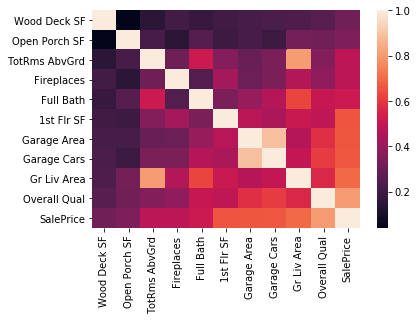

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)

plt.show()

In [ ]:
#korelirajo se tisti stolpci, ki so najbolj svetli
#npr: garage area se korelira z garage cars

#tiste stolpce, ki so med seboj zelo korelirani, lahko odstranimo, ne potrebujemo obeh

### Train And Test Model

In [29]:
#odstranimo enega od stolpcev,ki sta najbolj korelirana - dejansko ne potrebujemo obeh dveh
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


In [34]:
# v enem stolpcu imamo damo 1469 podatkov - zbrišemo na
features = final_corr_cols.drop(['SalePrice']).index
clean_test = test[final_corr_cols.index].dropna()
target = 'SalePrice'

In [35]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [37]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [38]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185852
41032.02612019769


### Removing Low Variance Features

In [ ]:
#odstranimo featur-je z nizko varianco

In [40]:
#formula
unit_train = (train[features] - train[features].min()) / (train[features].max() - train[features].min())

In [41]:
print(unit_train.min())
print(unit_train.max())

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64


In [42]:
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


### Final Model

In [43]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

In [44]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [46]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [47]:
train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

In [48]:
print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.427024377364


## Exercise: Predicting House Sale Prices


### Introduction

<img src="images/pipeline.svg">

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

In [50]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [51]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [52]:
len(df)

2930

In [53]:
def transform_features(df):
    return df

In [54]:
# ni manjčajočih vrednosti
df['Gr Liv Area'].isnull().sum()

0

In [55]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [56]:
def train_and_test(df, debug=False):  
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    

    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [59]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, debug=True)

rmse


#sedaj smo uporabili samo en feature

Selected features: ['Gr Liv Area']


57088.25161263909

### Feature Engineering

[Dataset metadata](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

#### Missing Values

1: All columns: Drop any with 5% or more missing values for now.

In [ ]:
#čiščenje manjkajočih vrednosti:
#1. vržemo ven celoten stolpec -- to naredimo, če ima stolpec veliko manjkajočih vrednosti
#2. zamenjamo manjkajčoe vrednosti z drugo vrednostjo (ki naj bo podobna..)

In [60]:
num_missing = df.isnull().sum()

In [61]:
num_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [63]:
# Filter Series to columns containing >5% missing values
#izberemo stolpce, ki imajo več kot 5% manjkajočih vrednosti -- te bomo zbrisali
drop_missing_cols = num_missing[num_missing >len(df)/20].sort_values()

In [64]:
drop_missing_cols

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [65]:
# Drop those columns from the data frame. Note the use of the .index accessor
df = df.drop(drop_missing_cols.index, axis = 1)

In [67]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
                   ..
Electrical          1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces

In [ ]:
#ostale  numerične manjkajoče vrednosti bomo nadomestili z eno drugo vrednostjo

2: Text columns: Drop any with 1 or more missing values for now.

In [70]:
#odvržemo stolpce, ki so tipa object in imajo manjkajoče vrednosti 
text_mv_counts = df.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending = False)

In [ ]:
## Series object: column name -> number of missing values


In [71]:
## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

In [72]:
df = df.drop(drop_missing_cols_2.index, axis =1)

In [73]:
#df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
BsmtFin SF 1        1
BsmtFin SF 2        1
                   ..
Central Air         0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [ ]:
#ostale numerične manjkajoče vrednosti nadomestimo z drugo vrednostjo

In [74]:
## Compute column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [85]:
## Compute the most common value for each column in `fixable_nmeric_missing_cols`.

#dobimo vrednosti, s katerimi bomo napolnili manjkajoče vrednosti
replacment_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient = 'records')[0]

In [86]:
replacment_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [88]:
## Use `pd.DataFrame.fillna()` to replace missing values.
#napolnimo dataset
df = df.fillna(replacment_values_dict)

In [89]:
## Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

#### Transforming Improper Numerical Features

In [90]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [91]:
df[['Year Remod/Add', 'Year Built']].head()

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


In [ ]:
#

In [92]:
#odštejemo 
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

#to -1 bomo odstranili

2180   -1
dtype: int64

In [93]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [94]:
## Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
#teh dveh stolpcev ne bomo več potrebovali, zbrišemo ju
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

Drop columns that:
- that aren't useful for ML
- leak data about the final sale, read more about columns here

In [95]:
## Drop columns that aren't useful for ML
#stolpci, ki a naš model niso uporabni
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
#teh podatkov običajno nimamo na voljo, ko napovedujemo ceno - odstranimo jih
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [96]:
df.dtypes.value_counts()

object     41
int64      24
float64    11
dtype: int64

In [140]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [141]:
def transform_features(df, debug=False):
    # naredimo kopijo dfja -- da ne spreminjamo originalnega dfja
    df_working = df.copy()
    
    # odstranimo vse stolpce ki vsebujejo več kot 5% manjkajočih vrednosti
    num_missing = df_working.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df_working)/20)].sort_values()
    if debug: print(f'\nDropping columns: {drop_missing_cols.index.tolist()}')
    df_working = df_working.drop(drop_missing_cols.index, axis = 1)
    
    # odstranimo vse stolpce ki vsebujejo object in manjkajoče vrednosti
    text_mv_counts =df_working.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending = False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    if debug: print(f'\nDropping columns (object): {drop_missing_cols_2.index.tolist()}')
    df_working = df_working.drop(drop_missing_cols_2.index, axis = 1)
    
    # ostale manjkajoče vrednosti dopolnemo z najbolj pogosto vrednostjo v stolpcu
    num_missing = df_working.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df_working)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df_working[fixable_numeric_cols.index].mode().to_dict(orient = 'records')[0]
    if debug: 
        print('\nReplacement values:')
        for key, value in replacement_values_dict.items():
            print(f'\t{key}: {value}')
            
    df_working = df_working.fillna(replacement_values_dict)
    
    
    # naredimo nove značilke
    years_sold = df_working['Yr Sold'] - df_working['Year Built']
    years_since_remod = df_working['Yr Sold'] - df_working['Year Remod/Add']
    df_working['Years Before Sale'] = years_sold
    df_working['Years Since Remod'] = years_since_remod
    drop_rows = years_since_remod[years_since_remod <0].index
    df_working = df_working.drop([drop_rows], axis=0)
    
    # odvržemo še ostale nepotrebne stolpce
    df_working = df_working.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    
    return df_working   

In [142]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, debug=True)

rmse


Dropping columns: ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC']

Dropping columns (object): ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Type', 'Electrical']

Replacement values:
	BsmtFin SF 1: 0.0
	BsmtFin SF 2: 0.0
	Bsmt Unf SF: 0.0
	Total Bsmt SF: 0.0
	Garage Cars: 2.0
	Garage Area: 0.0
	Bsmt Full Bath: 0.0
	Bsmt Half Bath: 0.0
	Mas Vnr Area: 0.0


KeyError: '[(1702, 2180, 2181)] not found in axis'

### Feature Selection

In [105]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head(5)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [106]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()

In [107]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
#samo tiste vrednosti, ki imajo več kot 0.4
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1      0.432914
Fireplaces        0.474558
TotRms AbvGrd     0.495474
Mas Vnr Area      0.508285
Garage Yr Blt     0.526965
Year Remod/Add    0.532974
Full Bath         0.545604
Year Built        0.558426
1st Flr SF        0.621676
Total Bsmt SF     0.632280
Garage Area       0.640401
Garage Cars       0.647877
Gr Liv Area       0.706780
Overall Qual      0.799262
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [108]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis = 1)

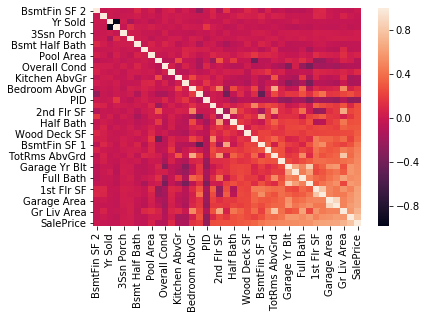

In [110]:
#zrišemo korelacije
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = numerical_df[abs_corr_coeffs.index].corr()
sns.heatmap(corrmat)
plt.show()

In [111]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

def select_features(df_, coeff_threshold=0.4, debug=False):
    df = df_.copy()
    df_org_shape = df.shape
    numerical_df = transform_df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis = 1)
    
    
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    return df

In [112]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df, coeff_threshold=0.4, debug=True)
rmse = train_and_test(filtered_df, debug=True)

rmse


Dropping columns: ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC']

Dropping columns (object): ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond', 'Mas Vnr Type', 'Electrical']

Replacement values:
	BsmtFin SF 1: 0.0
	BsmtFin SF 2: 0.0
	Bsmt Unf SF: 0.0
	Total Bsmt SF: 0.0
	Garage Cars: 2.0
	Garage Area: 0.0
	Bsmt Full Bath: 0.0
	Bsmt Half Bath: 0.0
	Mas Vnr Area: 0.0


KeyError: "['Mo Sold' 'Sale Condition' 'Sale Type'] not found in axis"

#### Categorical Features

In [113]:
#kako uporabiti kategorične tipe v linearni regresiji

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [114]:
df['Utilities'].value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [115]:
df['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [116]:
df['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [117]:
df['Utilities'] =df['Utilities'].astype('category')

In [118]:
df['Utilities'].head()

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: Utilities, dtype: category
Categories (3, object): [AllPub, NoSeWa, NoSewr]

In [119]:
#priredim kode
df['Utilities'].cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [120]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)
text_cols = transform_df.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(transform_df[col].unique()))
    
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
transform_df['Utilities'].cat.codes.value_counts()

KeyError: "['Mo Sold' 'Sale Condition' 'Sale Type'] not found in axis"

#### Dummy Coding

In [ ]:
#pretvorim v več stolpcev

In [125]:
pd.get_dummies(df['Utilities']).head()

,AllPub,NoSeWa,NoSewr
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [126]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [127]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

In [128]:
transform_cat_cols

['MS Zoning',
 'Street',
 'Alley',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [129]:
dummy_cols = pd.DataFrame()
for col in transform_cat_cols:
    col_dummies = pd.get_dummies(transform_df[col])
    transform_df = pd.concat([transform_df, col_dummies], axis = 1)
    del transform_df[col]
    

In [130]:
transform_df.shape

(2930, 207)

In [131]:
transform_df.head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,...,New,Oth,VWD,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,IR1,AllPub,Gtl,6,1960,1960,112.0,TA,TA,TA,...,0,0,0,1,0,0,0,0,1,0
1,Reg,AllPub,Gtl,5,1961,1961,0.0,TA,TA,TA,...,0,0,0,1,0,0,0,0,1,0
2,IR1,AllPub,Gtl,6,1958,1958,108.0,TA,TA,TA,...,0,0,0,1,0,0,0,0,1,0
3,Reg,AllPub,Gtl,7,1968,1968,0.0,Gd,TA,TA,...,0,0,0,1,0,0,0,0,1,0
4,IR1,AllPub,Gtl,5,1997,1998,0.0,TA,TA,Gd,...,0,0,0,1,0,0,0,0,1,0


In [132]:
transform_df.dtypes.value_counts()

uint8      171
object      21
int64        9
float64      6
dtype: int64

In [133]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [134]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)

KeyError: '[(1702, 2180, 2181)] not found in axis'

In [138]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
#vrne število unique vrednosti
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
uniqueness_counts


## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [139]:
drop_nonuniq_cols

Index([], dtype='object')

In [ ]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

In [ ]:
transform_df.dtypes.value_counts()

Update select_features()

In [ ]:
def select_features(df_, coeff_threshold=0.4, uniq_threshold=10, debug=False):
    #korelacije - skopirano od zgoraj
    df = df_.copy()
    df_org_shape = df.shape
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    
    #feature-ji, ki so kategorični tip
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
    
    #unique vrednosti v vsakem stolpcu
    #pustimo samo tiste stolpce, ki imajo več kot 10 umikatnih vrednosti
    uniqueness_counts = 
    drop_nonuniq_cols = 
    df = 
    
    #spremenimo v tip category
    text_cols = df.select_dtypes(include=['object'])

    #združimo 
    #df.concat
    
    return df

In [ ]:
#

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10,debug=False)
rmse = train_and_test(filtered_df)

rmse

### Train And Test

In [143]:
def train_and_test(df, k=0, debug=False):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

- When k equals 0, perform holdout validation (what we already implemented):
    - Select the first 1460 rows and assign to train.
    - Select the remaining rows and assign to test.
    - Train on train and test on test.
    - Compute the RMSE and return.

In [144]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        return rmse

- When k equals 1, perform simple cross validation:
    - Shuffle the ordering of the rows in the data frame.
    - Select the first 1460 rows and assign to fold_one.
    - Select the remaining rows and assign to fold_two.
    - Train on fold_one and test on fold_two.
    - Train on fold_two and test on fold_one.
    - Compute the average RMSE and return.

In [ ]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        #dva dela: enkrat je en train in en test, drugič obratno
        #dobimo dve napaki - na koncu izračunamo povprečje obeh
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        if debug: print(rmse_one)
        if debug: print(rmse_two)
        return avg_rmse






        print(rmse_one)
        print(rmse_two)
        return avg_rmse

- When k is greater than 1, implement k-fold cross validation using k folds:
    - Perform k-fold cross validation using k folds.
    - Calculate the average RMSE value and return this value.

In [146]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        if debug: print(rmse_one)
        if debug: print(rmse_two)
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = ()
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train['SalePrice'])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test['SalePrice'], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        
    if debug: print(rmse_values)
    avg_rmse = np.mean(rmse_values)
    
    
    
    
    
    
    return avg_rmse

### Using the model

In [147]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

KeyError: '[(1702, 2180, 2181)] not found in axis'

#### Testing different thresholds

In [ ]:
#za različne vrednosti probamo
# coeff_threshold
coeff_threshold_params = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)




In [ ]:
#oeff threshold : koliko korelacije vzamemo
#unique_ threshold: koliko unique stolpcev ima lahko
#te dve vrednosti določimo tako, da sprobavamo, težko je na pamet ju določiti

#probavam različne vrednosti
#v list zapisujem napake in pogledam, za katero vrednost je najmanjša

In [ ]:
rmse_values

In [ ]:
#zrišemo napake: najboljša je pri 0.4
plt.scatter(x=coeff_threshold_params, y=rmse_values)
plt.show()

In [ ]:
# uniq_threshold
#različne vrednosti uporabim, shranjujem napake
uniq_threshold_params = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)



In [ ]:
rmse_values

In [ ]:
#zrišemo napake
plt.scatter(x=uniq_threshold_params, y=rmse_values)
plt.show()

#najboljši je pri 13

In [ ]:
# optimiziran model
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.1, uniq_threshold=5,debug=False)
rmse = train_and_test(filtered_df, k=4)
rmse